In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from scipy.interpolate import barycentric_interpolate
from scipy.optimize import root
from mpl_toolkits.mplot3d import Axes3D
import scipy

Lab Objective: We introduce the method of mean weighted residuals (MWR)
and use it to derive a pseudospectral method. This method will then be used to solve
several boundary value problems.

# Problem 1 

In [2]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    dX = X - X.T
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

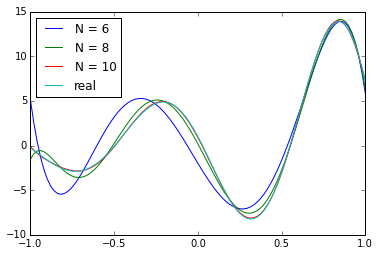

In [3]:
N = [6,8,10]
def actual(x):
    return np.exp(x)*np.cos(6*x)-6*np.exp(x)*np.sin(6*x)
def u(x):
        return np.exp(x)*np.cos(6*x)
for n in N:
    D, X = cheb(n)
    u_prime = np.dot(D,u(X))
    y_vals = scipy.interpolate.barycentric_interpolate(X,u_prime,np.linspace(-1,1,100))
    plt.plot(np.linspace(-1,1,100),y_vals,label = 'N = {}'.format(n))

plt.plot(np.linspace(-1,1,100),actual(np.linspace(-1,1,100)),label = 'real')
plt.legend(loc=2)
plt.show()
    


    

# Problem 2

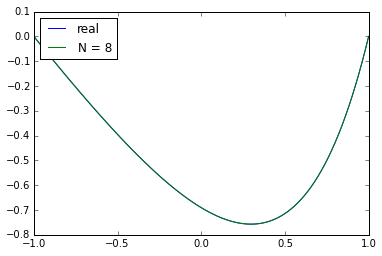

In [4]:
def actual2(x):
    return (-1*np.cosh(2)-np.sinh(2)*x+np.exp(2*x))/4.
plt.plot(np.linspace(-1,1,100),actual2(np.linspace(-1,1,100)),label = 'real')
def f(x):
    return np.exp(2*x)
D, X = cheb(8)
x_vals = np.linspace(-1,1,100)
D2 = np.dot(D, D)
D2[0,:], D2[-1,:] = 0, 0
D2[0,0], D2[-1,-1] = 1, 1
F = f(X)
F[0], F[-1] = 0, 0
u = np.linalg.solve(D2,F)
y_vals = scipy.interpolate.barycentric_interpolate(X,u,x_vals)
plt.plot(x_vals,y_vals,label = 'N = 8')
plt.legend(loc=2)

plt.show()

# Problem 3

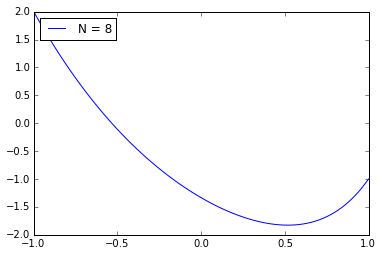

In [5]:
#def actual2(x):
#    return (-1*np.cosh(2)-np.sinh(2)*x+np.exp(2*x))/4.
#plt.plot(np.linspace(-1,1,100),actual2(np.linspace(-1,1,100)),label = 'real')
def f(x):
    return np.exp(3*x)
D, X = cheb(8)
x_vals = np.linspace(-1,1,100)
D2 = np.dot(D, D)
L = D2 +D
L[0,:], L[-1,:] = 0, 0
L[0,0], L[-1,-1] = 1, 1
F = f(X)
F[0], F[-1] = -1, 2
u = np.linalg.solve(L,F)
y_vals = scipy.interpolate.barycentric_interpolate(X,u,x_vals)
plt.plot(x_vals,y_vals,label = 'N = 8')
plt.legend(loc=2)

plt.show()

# Problem 4

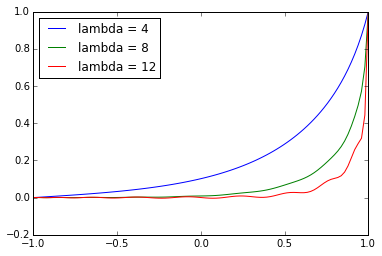

In [6]:
N  = 20
D, X = cheb(N)
lamb_list = [4,8,12]
for lamb in lamb_list:
    def F(u):  
        D2 = np.dot(D, D)
        F = 4*np.dot(D2,u)-lamb*np.sinh(lamb*u)
        F[0], F[-1] = u[0]-1,u[-1]-0
        return F
    guess = np.ones(N+1)
    sol = root(F,guess).x
    x_vals = np.linspace(-1,1,100)
    y_vals = scipy.interpolate.barycentric_interpolate(X,sol,x_vals)
    plt.plot(x_vals,y_vals,label = 'lambda = {}'.format(lamb))
plt.legend(loc=2)

plt.show()

# Problem 5

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


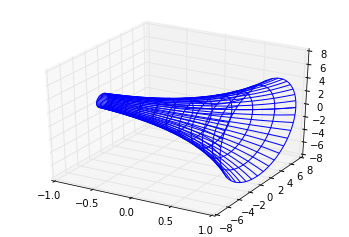

Surface Area =  210.643469851


In [7]:
N  = 50
D, X = cheb(N)
def F(u):  
    D2 = np.dot(D, D)
    F = u*np.dot(D2,u)-np.dot(D,u)*np.dot(D,u)-np.ones(len(u))
    F[0], F[-1] = u[0]-7,u[-1]- 1
    return F

guess = 2*np.ones(N+1)
sol = root(F,guess).x
x_vals = np.linspace(-1,1,100)
barycentric = scipy.interpolate.barycentric_interpolate(X,sol,x_vals) #This is the output of barycentric_interpolate() on ←-

lin = np.linspace(-1, 1, 100)
theta = np.linspace(0,2*np.pi,401)
X, T = np.meshgrid(lin, theta)
Y, Z = barycentric*np.cos(T), barycentric*np.sin(T)
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()
print "Surface Area = ", 1./25*np.sum(2*np.pi*sol*np.sqrt(1+(D.dot(sol))**2))